## Observations and Insights

1. A decrease in tumor volume was observed in only two of the ten regimens. These two were Capomulin and Ramicane.
2. Along with tumor volume decrease, the survival rate through 45 days for mice given the Capomulin or Ramicane regimen was significantly higher at 70%, with the other regimens averaging 44.5%
3. The Pearson correlation coefficient between mouse weight and tumor volume is .95, which shows these two factors are very highly correlated. 
4. In summary, Pymaceuticals' drug of interest, Capomulin, along with Ramicane, were the only regimens which showed any potential. The majority of the other regimens barely outperformed placebos, with some regimens faring worse.


## Dependencies and starter code

In [12]:
#Magic function notebook
%matplotlib notebook

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
#from sklearn import datasets

#Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

## Summary statistics

In [13]:
#pull only only pertinant data
tumor_vol = all_data[['Drug Regimen','Tumor Volume (mm3)']]
#group data by regimen
drug_group = tumor_vol.groupby('Drug Regimen')
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean of tumor volume
drug_mean = drug_group.mean()
#median
drug_median = drug_group.median()
#variance
drug_variance = drug_group.var()
#standard deviation
drug_std = drug_group.std()
#SEM
drug_sem = drug_group.sem()

In [14]:
#merge first to tables to start df
sum_df = pd.merge(drug_mean, drug_median, on='Drug Regimen')
#rename columns to stop renaming issues later
sum_df = sum_df.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
#add variance to df
sum_df = pd.merge(sum_df, drug_variance, on='Drug Regimen')
#add standard deviation to df
sum_df = pd.merge(sum_df, drug_std, on='Drug Regimen')
#add SEM to df
sum_df = pd.merge(sum_df, drug_sem, on='Drug Regimen')
#rename remaining columns
sum_df = sum_df.rename(columns = {'Tumor Volume (mm3)_x': 'Variance', 'Tumor Volume (mm3)_y': 'Std Dev', 'Tumor Volume (mm3)': 'SEM'})
#print df
sum_df = sum_df.round(decimals=3)
#all headings equals, easier to read
sum_df = sum_df.reset_index()
sum_df.to_csv('output_files/summary_data.csv', index=False)
sum_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.323,50.855,42.351,6.508,0.513
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar plots

<IPython.core.display.Javascript object>


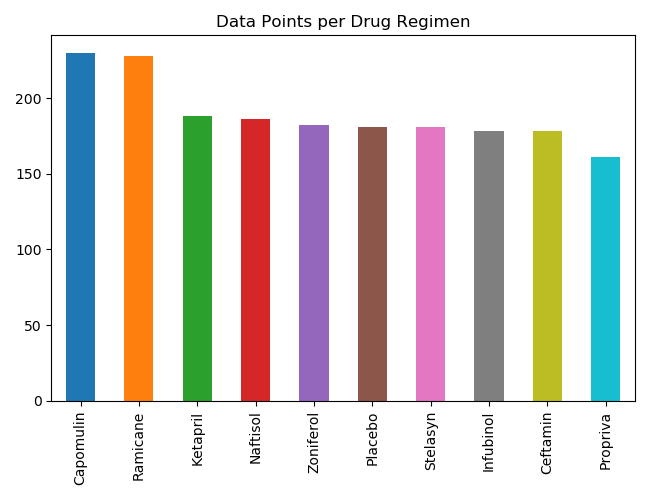

In [15]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
#p1
#Get a count of data points per drug regimen
drug_count_p1 = all_data['Drug Regimen'].value_counts()
#set graph colors
colors_p1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#create the bar chart using pandas
drug_count_p1.plot(kind='bar', figsize=(6.5,5), color=colors_p1, title='Data Points per Drug Regimen')
#brings everything into view
plt.tight_layout()
#save chart in output folder
plt.savefig('output_files/points_pandas.png')

<IPython.core.display.Javascript object>


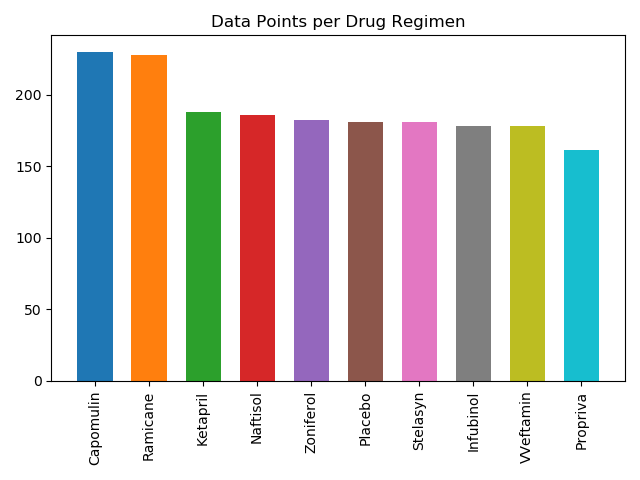

In [16]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot
#p2
#get a count of data points per drug regimen
count_p2 = all_data['Drug Regimen'].value_counts()
#
x_axis_p2 = np.arange(len(count_p2))
#set colors for chart
colors_p2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#plot bar chart and attributes
plt.bar(x_axis_p2, count_p2, color=colors_p2, width=.65)
#chart title
plt.title('Data Points per Drug Regimen')
#set locations and label x axis
tick_locations = [value for value in x_axis_p2]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'VVeftamin', 'Propriva'], rotation=90)
#brings everything into view
plt.tight_layout()
#save chart in output folder
plt.savefig('output_files/points_pplot.png')

## Pie plots

In [17]:
#create a df with unique mice to prevent data being skewed
#group the df by Mouse ID
mice_groupby = all_data.groupby('Mouse ID')
#make a list of unique mice
unique_mice = mice_groupby['Sex'].max()
#create the df
unique_mice_df = pd.DataFrame(unique_mice)

<IPython.core.display.Javascript object>


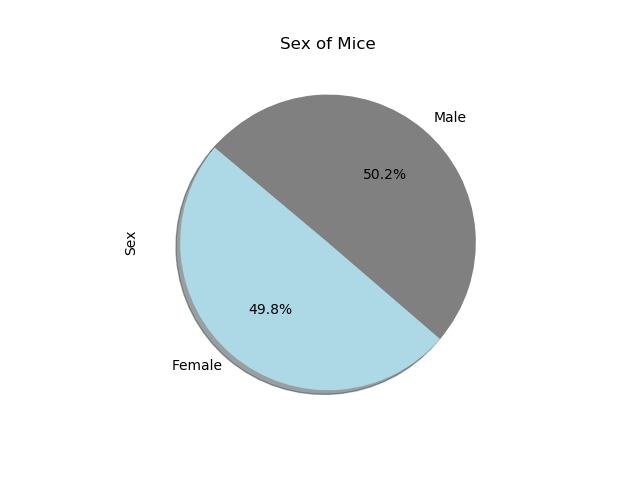

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#group mice by sex
mouse_group = unique_mice_df.groupby('Sex')
#get a count of sex
group_count = mouse_group['Sex'].count()
#set colors for chart
colors=['lightblue','grey']
#plot pie chart and attributes
group_count.plot(kind='pie', autopct='%1.1f%%', shadow=True, title='Sex of Mice', startangle=140, colors=colors)
#save chart in output folder
plt.savefig('output_files/gender_pie_pandas.png')

<IPython.core.display.Javascript object>


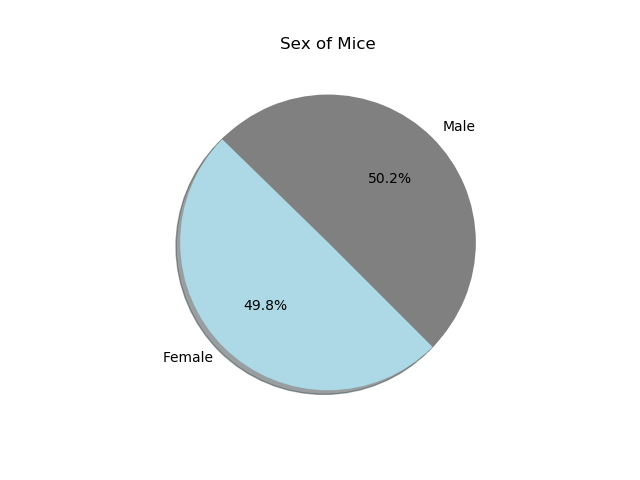

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#get a count of mice grouped by sex
count = unique_mice_df['Sex'].value_counts()
#data for labels
sex = ['Male', 'Female']
#set colors for chart
colors=['grey','lightblue']
#plot pie chart and attributes
plt.pie(count, labels=sex, autopct='%1.1f%%', shadow=True, startangle=315, colors=colors)
#chart title
plt.title('Sex of Mice')
#save chart in output folder
plt.savefig('output_files/gender_pie_pplot.png')

## Quartiles, outliers and boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#group the df by Mouse ID
mouse = all_data.groupby('Mouse ID')
#Find the max tumor vol per ID
mouse2 = mouse['Tumor Volume (mm3)'].max()
#convert back to df
mouse2 = pd.DataFrame(mouse2)
#Merge the max tumor vol back in the mouse metadata
mouse3 = pd.merge(mouse_metadata, mouse2, how='outer', on='Mouse ID')
#set the index for the .loc
mouse3 = mouse3.set_index(['Drug Regimen'])
#locate the rows with the requested drug regimens
mouse4 = mouse3.loc[mouse3.index.isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#pull the final tumor vol per ID and round
final_tumor_vol = mouse4['Tumor Volume (mm3)'].round(3)
#print the final tumor vol
final_tumor_vol.head()

Drug Regimen
Ramicane     45.000
Capomulin    45.000
Capomulin    45.474
Capomulin    45.000
Ramicane     45.852
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#calculate the quartiles
quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

#calculate the upper and lower bounds and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.51
The upper quartile of tumor volume is: 59.930249999999994
The interquartile range of tumor volume is: 14.420249999999996
The the median of tumor volume is: 46.86 
Values below 23.879625000000004 could be outliers.
Values above 81.56062499999999 could be outliers.


<IPython.core.display.Javascript object>


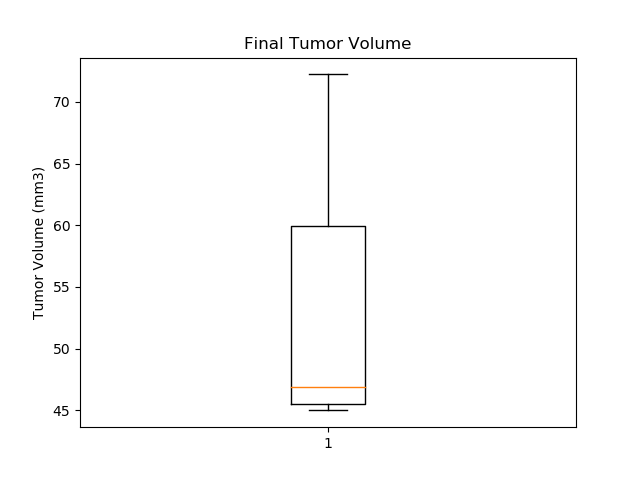

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#set the subplots
fig1, ax1 = plt.subplots()
#tital the plot
ax1.set_title('Final Tumor Volume')
#label the x axis
ax1.set_ylabel('Tumor Volume (mm3)')
#plot the final tumor vol
ax1.boxplot(final_tumor_vol)
#save the plot in output folder
plt.savefig('output_files/final_tumor_vol.png')

## Line and scatter plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#locate data from df based on Capomulin drug regimen
capo_only = all_data.loc[all_data['Drug Regimen'] == 'Capomulin']
#group Capomulin data by Timepoint and aggregate 
cap_time_tumor = capo_only.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

<IPython.core.display.Javascript object>


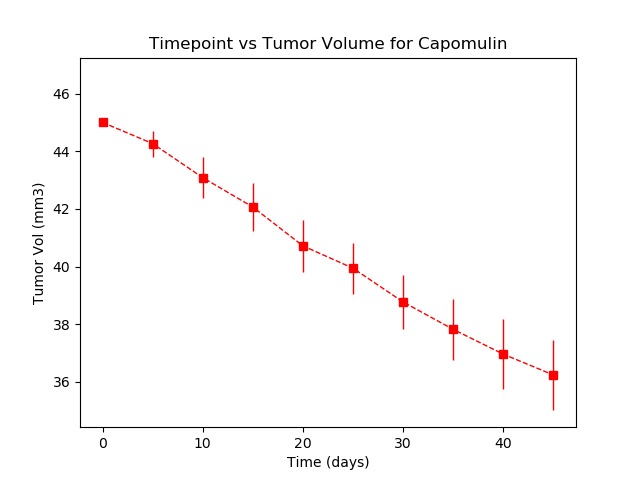

In [25]:
#get an index of values from aggregate groupby
time_series = list(cap_time_tumor.index.values)
#plot the line chart with error bars
plt.errorbar(
    #set the x values
    time_series,
    #set the y values
    cap_time_tumor['Tumor_Vol_Mean'],
    #set the y values for error bars
    yerr=cap_time_tumor['Tumor_Vol_SEM'],
    #label chart
    label="Time Series of Tumor Volume for Capomulin",
    #format the line
    fmt="rs--", # format line using dashed lines for plot()
    #set the width of the line
    linewidth=1	
    )
#set chart title
plt.title("Timepoint vs Tumor Volume for Capomulin")
#set x axis label
plt.xlabel("Time (days)")
#set y axis label
plt.ylabel("Tumor Vol (mm3)")
#set x axis min and max limits
plt.xlim(min(time_series)-(max(time_series)*.05), max(time_series)*1.05)
#set y axis min and max limits
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean']*.95), max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
#save the chart in output folder
plt.savefig('output_files/time_tumor_line.png')

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#pull data based on specific drug regimen 
capo_list = all_data.loc[all_data['Drug Regimen'] == 'Capomulin']
#create list with only data for the Capomulin regimen
capo_list = all_data.loc[all_data['Drug Regimen'] == 'Capomulin']
#create new list from Capomulin only list containing just weight and tumor volume
weight_tumor = capo_list[['Weight (g)', 'Tumor Volume (mm3)']]
#group above list by mouse weight
weight_group = weight_tumor.groupby('Weight (g)')
#take the mean of the tumor volume grouped by mouse weight
avg_tumor = weight_group.mean()
#create DF
avg_tumor = pd.DataFrame(avg_tumor)
#reset the DF index to pull data properly
avg_tumor = avg_tumor.reset_index()

<IPython.core.display.Javascript object>


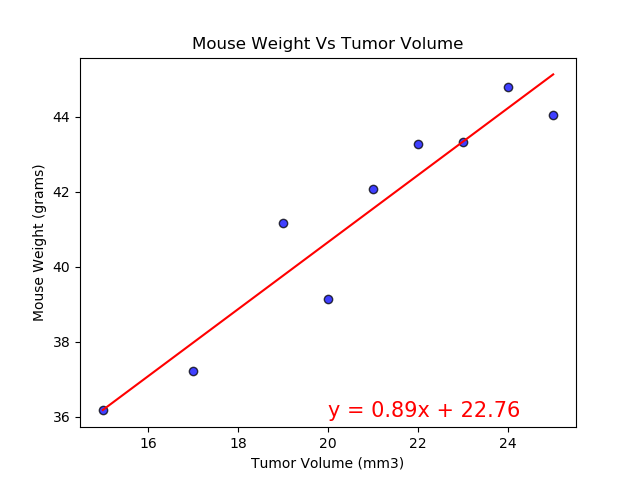

The correlation between both factors is 0.95


In [27]:
#create scatter plot and attributes
#set the x values
x_values = avg_tumor['Weight (g)']
#set the y values
y_values = avg_tumor['Tumor Volume (mm3)']
#set all other attributes for plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#set the regress values
regress_values = x_values * slope + intercept
#set the line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))
#plot the scatter plot
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black', alpha=.75)
#plot the regression line
plt.plot(x_values, regress_values, 'r-')
#annotate the line equation
plt.annotate(line_eq,(20,36), fontsize=15, color='red')
#title the plot
plt.title('Mouse Weight Vs Tumor Volume')
#label the x axis
plt.xlabel('Tumor Volume (mm3)')
#label the y axis
plt.ylabel('Mouse Weight (grams)')
#calculate the correlation coefficient
correlation = st.pearsonr(x_values, y_values)
#print the correlation coefficient
print(f'The correlation between both factors is {round(correlation[0],2)}')
#save the chart in output folder
plt.savefig('output_files/weight_tumor_scatter.png')